In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
# constants
m = 100 #GeV
sigmav = 2.6e-9  # GeV^-2
g_star = 80 # at freeze out
g = 2
Mpl = 1.22e19  # GeV
pi = 3.141592653589793
# G in terms of Mpl
G = 1 / Mpl**2

In [3]:
def boltzmann_eq(x, Y):
  T = m/x
  H = ((8 * (pi**3) * G * g_star * (T**4)) / 90)**0.5  # since at very high temperatures g_start_s is approximately same as g_start
  S = (2 * pi**2 * g_star * T**3) / 45
  n_EQ = g * np.exp(-m/T) * ((m * T / (2 * pi))**(1.5))
  Y_EQ = n_EQ / S
  return -(S * sigmav * (Y**2 - Y_EQ**2))/(H * x)

In [5]:
# solving Boltzmann equation
x_start = 1.0
x_end = 1000.0
T0 = m/x_start
Y0 = ((g * np.exp(-x_start) * (m * T0)/(2*pi))**1.5) / ((2 * pi**2 * g_star * T0**3)/45)

sol = solve_ivp(
    boltzmann_eq,
    (x_start, x_end),
    [Y0],
    method="Radau",
    rtol=1e-6,
    atol=1e-12
)
sol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 1.000e+00  1.000e+00 ...  9.462e+02  1.000e+03]
        y: [[ 1.142e-03  1.179e-03 ...  3.051e-12  3.047e-12]]
      sol: None
 t_events: None
 y_events: None
     nfev: 3514
     njev: 155
      nlu: 670

In [7]:
# finding relic density
Y_inf = sol.y[0][-1]
relic_density = 2.742e8 * m * Y_inf
relic_density

np.float64(0.08354230349670465)

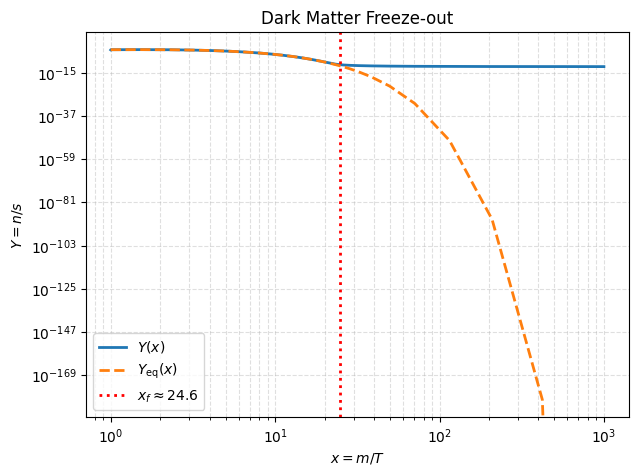

In [13]:
# plotting freeze out curve
x_val = sol.t
Y_val = sol.y[0]
# for Y equilibrium values
def Y_eq(x):
    T = m / x
    S = (2 * pi**2 * g_star * T**3) / 45
    n_eq = g * np.exp(-m/T) * (m * T / (2 * pi))**1.5
    return n_eq / S
Yeq_val = np.array([Y_eq(x) for x in x_val])

mask = Yeq_val > 0
ratio = Y_val[mask] / Yeq_val[mask]
x_masked = x_val[mask]

xf_index = np.where(ratio > 2)[0][0]
xf = x_masked[xf_index]

plt.figure(figsize=(7, 5))

# Main curves
plt.loglog(x_val, Y_val, label=r"$Y(x)$", linewidth=2)
plt.loglog(x_val, Yeq_val, "--", label=r"$Y_{\rm eq}(x)$", linewidth=2)

# Freeze-out marker
plt.axvline(
    xf,
    color="red",
    linestyle=":",
    linewidth=2,
    label=fr"$x_f \approx {xf:.1f}$"
)

# Labels and formatting
plt.xlabel(r"$x = m/T$")
plt.ylabel(r"$Y = n/s$")
plt.title("Dark Matter Freeze-out")

plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.4)

plt.show()